In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [19]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
len(X_train) #getting to know the length of X_train

60000

In [21]:
X_train.shape #consists of 60,000 2D arrays of size 28 by 28

(60000, 28, 28)

In [22]:
X_train = X_train / 255
X_test = X_test / 255  #scaling

In [23]:
#We want to flatten the array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
model = keras.Sequential([
  keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
]) #having a stack of layers in my neural networks



model.compile(optimizer="adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9262


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9259


[0.26591190695762634, 0.9258999824523926]

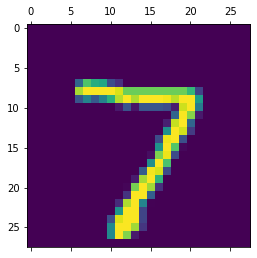

In [27]:
plt.matshow(X_test[0])

In [29]:
y_predicted = model.predict(X_test_flattened)

In [31]:
np.argmax(y_predicted[0]) #find the maximum value (and prints its index)

7

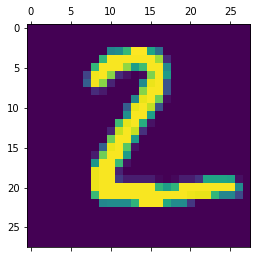

In [33]:
plt.matshow(X_test[1])

In [34]:
np.argmax(y_predicted[1])

2

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [38]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [39]:
confusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    3,    2,    0,    7,    9,    3,    2,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   4,    7,  939,   14,    8,    2,   11,    9,   34,    4],
       [   2,    0,   27,  916,    0,   18,    2,   12,   24,    9],
       [   1,    1,    7,    1,  914,    0,    8,    4,    8,   38],
       [   8,    2,    6,   38,   11,  760,   14,    7,   38,    8],
       [  10,    3,    8,    1,    8,   11,  911,    2,    4,    0],
       [   1,    7,   27,    6,    9,    0,    0,  942,    2,   34],
       [   6,    9,    8,   17,    9,   20,    8,   10,  879,    8],
       [   9,    7,    2,    8,   25,    5,    0,   15,    9,  929]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

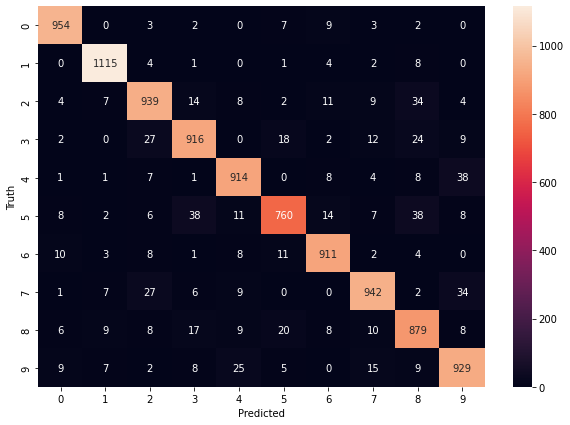

In [41]:
#we can visualize it better through seaborn

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confusionMatrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
#we are adding a hidden layer to improve  performance

model = keras.Sequential([
  keras.layers.Dense(100, input_shape=(784,), activation="relu"),
  keras.layers.Dense(10, activation="sigmoid") 
]) #having a stack of layers in my neural networks

#knows how to figure out input layer

model.compile(optimizer="adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

model.fit(X_train_flattened, y_train, epochs=5)




Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2771 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9848


In [45]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9768


[0.0755501464009285, 0.9768000245094299]

Text(69.0, 0.5, 'Truth')

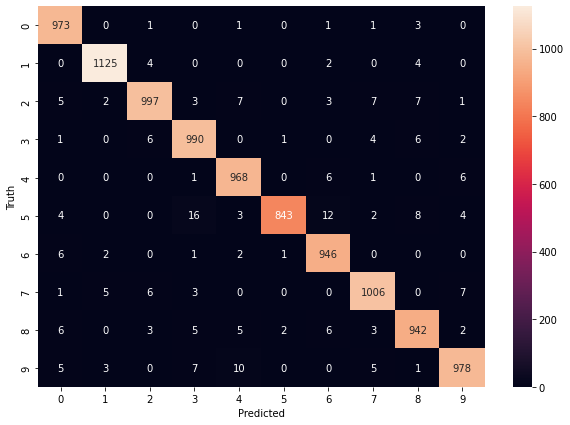

In [47]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

#we can visualize it better through seaborn

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confusionMatrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')